In [3]:
pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


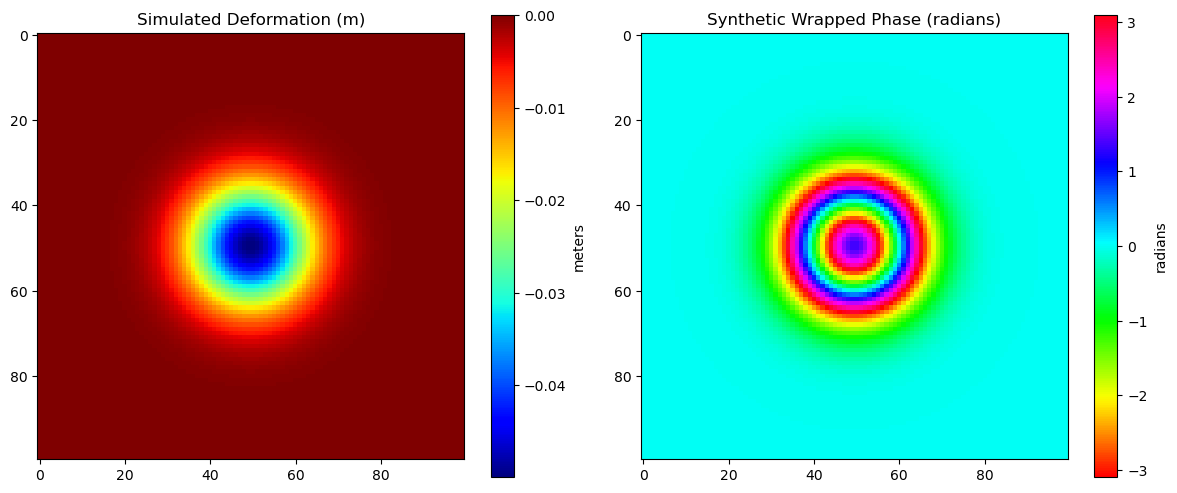

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
size = 100  # 100x100 grid
wavelength = 0.056  # radar wavelength in meters (Sentinel-1 ~5.6 cm)
max_deformation = -0.05  # 5 cm subsidence

# Create a grid
x = np.linspace(-50, 50, size)
y = np.linspace(-50, 50, size)
X, Y = np.meshgrid(x, y)

# Gaussian deformation (centered)
sigma = 10
deformation = max_deformation * np.exp(-(X**2 + Y**2) / (2 * sigma**2))  # in meters

# Convert deformation to phase (radians)
# Phase = (4 * pi / wavelength) * deformation
phase = (4 * np.pi / wavelength) * deformation  # wrapped phase will be between -pi and pi

# Wrap the phase (simulate what SAR sees)
wrapped_phase = np.angle(np.exp(1j * phase))

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Simulated Deformation (m)")
plt.imshow(deformation, cmap='jet')
plt.colorbar(label='meters')

plt.subplot(1, 2, 2)
plt.title("Synthetic Wrapped Phase (radians)")
plt.imshow(wrapped_phase, cmap='hsv')
plt.colorbar(label='radians')

plt.tight_layout()
plt.show()


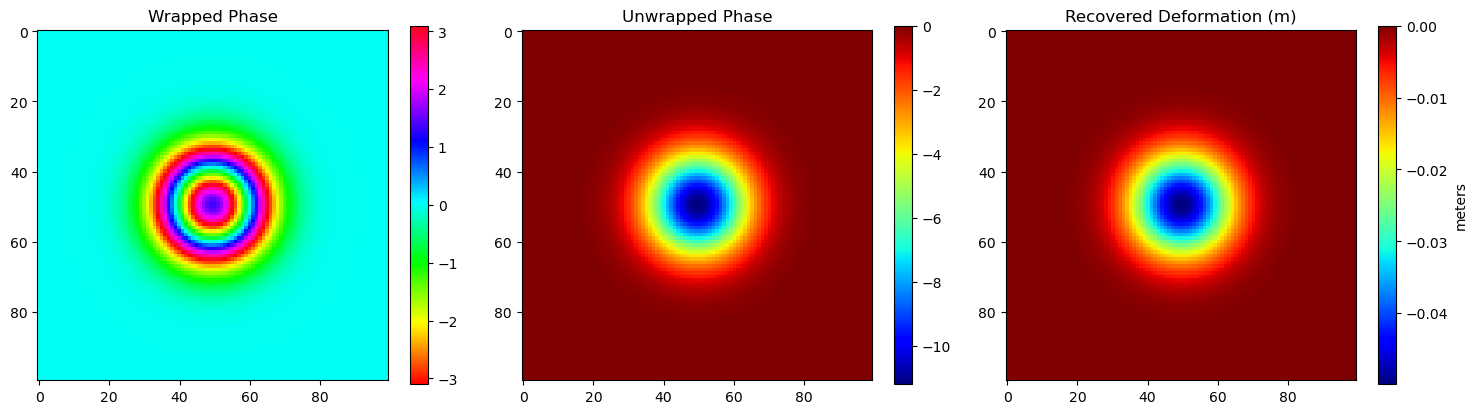

In [7]:
def unwrap_phase_2d(wrapped):
    """Basic 2D phase unwrapping by sequential 1D unwraps."""
    unwrapped = np.unwrap(wrapped, axis=0)  # unwrap along rows
    unwrapped = np.unwrap(unwrapped, axis=1)  # unwrap along columns
    return unwrapped

# Apply unwrapping
unwrapped_phase = unwrap_phase_2d(wrapped_phase)

# Recover deformation from unwrapped phase
# deformation = phase * wavelength / (4 * pi)
recovered_deformation = unwrapped_phase * (wavelength / (4 * np.pi))

# Plot results
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title("Wrapped Phase")
plt.imshow(wrapped_phase, cmap='hsv')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Unwrapped Phase")
plt.imshow(unwrapped_phase, cmap='jet')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Recovered Deformation (m)")
plt.imshow(recovered_deformation, cmap='jet')
plt.colorbar(label='meters')

plt.tight_layout()
plt.show()


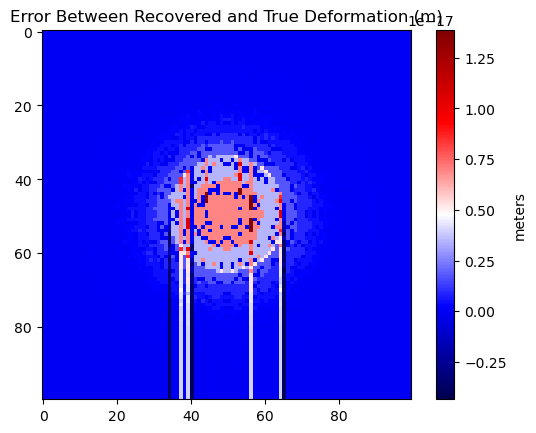

Max error: 0.000000 m


In [9]:
error_map = recovered_deformation - deformation

plt.title("Error Between Recovered and True Deformation (m)")
plt.imshow(error_map, cmap='seismic')
plt.colorbar(label='meters')
plt.show()

print(f"Max error: {np.max(np.abs(error_map)):.6f} m")


In [11]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Fitted Parameters:
Amplitude: -0.0500 m, Center: (-0.00, -0.00), Sigma: (10.00, 10.00)


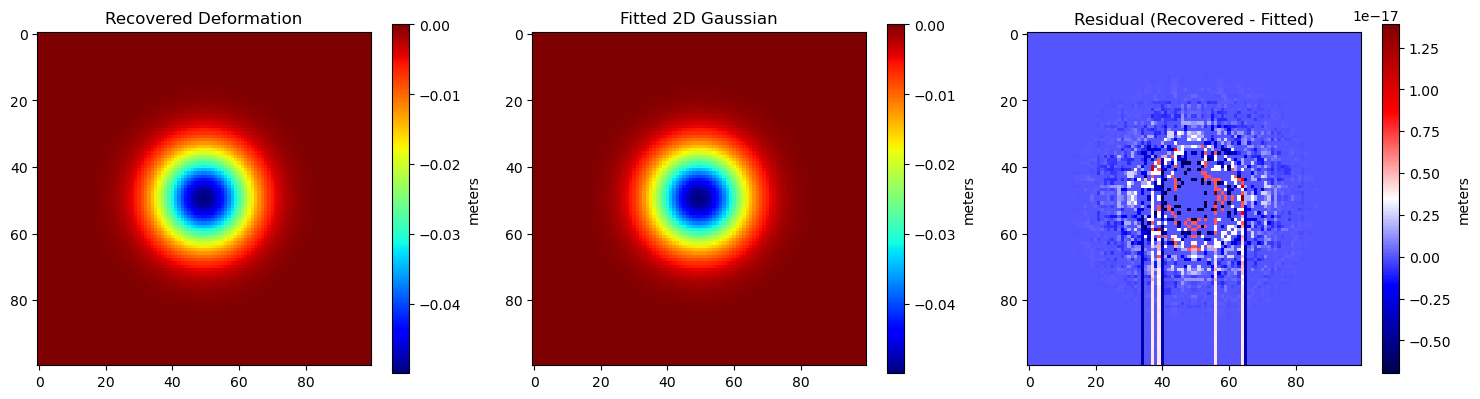

In [13]:
from scipy.optimize import curve_fit

# Flatten grid and data for fitting
def gaussian_2d(coords, A, x0, y0, sigma_x, sigma_y):
    x, y = coords
    return A * np.exp(-((x - x0)**2 / (2 * sigma_x**2) + (y - y0)**2 / (2 * sigma_y**2)))

# Prepare data
X_flat = X.ravel()
Y_flat = Y.ravel()
Z_flat = recovered_deformation.ravel()

# Initial guess: [amplitude, x_center, y_center, sigma_x, sigma_y]
initial_guess = [-0.05, 0, 0, 10, 10]

# Fit
params, _ = curve_fit(gaussian_2d, (X_flat, Y_flat), Z_flat, p0=initial_guess)

# Extract fitted values
A_fit, x0_fit, y0_fit, sigma_x_fit, sigma_y_fit = params
print("Fitted Parameters:")
print(f"Amplitude: {A_fit:.4f} m, Center: ({x0_fit:.2f}, {y0_fit:.2f}), Sigma: ({sigma_x_fit:.2f}, {sigma_y_fit:.2f})")

# Generate fitted model
Z_fit = gaussian_2d((X, Y), *params).reshape(size, size)

# Plot comparison
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title("Recovered Deformation")
plt.imshow(recovered_deformation, cmap='jet')
plt.colorbar(label='meters')

plt.subplot(1, 3, 2)
plt.title("Fitted 2D Gaussian")
plt.imshow(Z_fit, cmap='jet')
plt.colorbar(label='meters')

plt.subplot(1, 3, 3)
plt.title("Residual (Recovered - Fitted)")
plt.imshow(recovered_deformation - Z_fit, cmap='seismic')
plt.colorbar(label='meters')

plt.tight_layout()
plt.show()


In [15]:
import os
os.getcwd()

'C:\\Users\\Admin\\Machine-Learning-Projects\\ InSAR Phase Analysis using Python + Mathematical Modeling'